# Data Fusion Assignment 1: Kalman Filter

In this assignment, the task is to implement a Kalman filter to estimate the position of an object. In fact, the goal is to compare the accuracy of position estimates for two different objects using two different Kalman filters. One Kalman filter assumes the objects move approximately with a constant velocity and one Kalman filter assumes the objects move approximately with a constant acceleration.

The two different Kalman filters will each be estimating the 2D positions of two different objects. Depending on the Kalman filter that will be used the state vector contains the 2D position and velocity *or* the 2D position, velocity and acceleration of the object. The state vector of the constant acceleration Kalman filter is therefore defined as follows:

##### <center>$x_{\textrm{const.acc.}} = \begin{bmatrix} x \\ v_x \\ a_x \\ y \\ v_y \\ a_y \end{bmatrix}$,</center>

where $x$ is the position along the X axis and $y$ is the position along the Y axis. The velocity of the object is represented by $v_x$ and $v_y$, for the velocity along the X and Y axes, respectively. Finally, the accelerations of the object along the X and Y axes are represented by $a_x$ and $a_y$. The state vector for the constant velocity Kalman filter does not contain accelerations and is defined as follows:

##### <center>$x_{\textrm{const.vel.}} = \begin{bmatrix} x \\ v_x \\ y \\ v_y \end{bmatrix}$,</center>

In a Kalman filter, state estimates will be refined using measurements. Two sets of measurements are provided, one for each of the two different objects. The measurements contain 2D positions of objects that are affected by measurement noise and are provided in a Cartesian coordinate frame. The two data files (one for each object) also contain the true positions of the object of interest at each point in time, such that it is possible to analyze the quality of the estimates provided by the Kalman filter. Obviously these ground truth positions will not be used by our Kalman filter.

Before implementing the Kalman filters, we need to import the required modules.

In [22]:
# Required
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

As mentioned before, there are two sets of measurements. One for object 1 and one for object 2. Below you can choose which of the data files to load.

In [23]:
# Indicator for the object data to load (1 or 2)
object_indicator = 2

Now that we have defined which measurement data to use, we define parameters that are needed for the simulations with the Kalman filter later. It is assumed that for each object, a control input affects the motions of the object. The input represents a force that directly impacts the acceleration of the object in each direction ($F = m*a$, with $m=1$ kg for simplicity, so $F=a$). The control input is 2D ($x$ and $y$). Note that the values of the forces, represented by the control input $u$ and defined in the code block below, depend on the object data that is loaded.

In [24]:
# Given parameters for the assignment

# Time step size
dt = 0.1

# Total simulation time for this assigment
t_end = 8.0

# Motion model noise (this is the noise associated with the process model)
std_acc_motion_noise = 0.05

# Measurement noise (this is the noise associated with the measurement model)
std_pos_meas = 0.01


## Importing object data (measurements and ground truth positions)
if object_indicator == 1:
    mat = scipy.io.loadmat('assignment_kalman_filter_object1.mat')

    # Set the control input (input is acceleration_x, acceleration_y)
    u = np.array([[1],[0.5]])
    
elif object_indicator == 2:
    mat = scipy.io.loadmat('assignment_kalman_filter_object2.mat')

    # Set the control input (input is acceleration_x, acceleration_y)
    u = np.array([[0],[0]])
else:
    print("Object value must be either 1 or 2!")

# Read the 2D position measurements for all time steps from the data file
z_vec = np.array(mat['z_vec'])

# Read the true object positions at each time step from the data file
x_true_mat = np.array(mat['x_true_mat'])

The goal of this assignment is to compare the performance of the two Kalman filters. As explained before, the first Kalman filter assumes motions can be predicted by a constant velocity process model. The second Kalman filter uses a constant acceleration process model instead. Below you can specify which of the two process models you would like to use for the estimation of states. Note that both models should be implemented, however, they will be tested one at a time. In case of using the constant velocity process model the dimension of the state space is four, as indicated by the vector given before. In case of a constant acceleration process model, the dimension of the state space is six.

In [25]:
# Indicator for process model (1: constant velocity or 2: constant acceleration)
model_indicator = 1

Measurement noise is assumed to be the *same* for both models. The standard deviation of the Gaussian measurement noise has been given in the code block above.

## Exercise 1:
Fill in all the matrices that are necessary to implement the Kalman filter. You can find the variable names for each matrix, along with a brief description of the matrix below.

In [26]:
def m1():
    # Kalman filter model 1: Constant velocity process model
    # State vector: [x, v_x, y, v_y]^T

    ## Fill in the matrices bellow.

    # Initialize the state transition matrix F1 (0.5 pts)
    F1 = np.array([[1, dt, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, dt],
                  [0, 0, 0, 1]])

    # Initialize the measurement model matrix H1 (0.5 pts)
    H1 = np.array([[1, 0, 0, 0],
                  [0, 0, 1, 0]])

    # Set the process model noise covariance matrix for this process model (0.5 pts)
    # Hint: see equation (24) in the paper:
    #   Survey of Maneuvering Target Tracking. Part I: Dynamic Models, by Li and Jilkov
    Q1 = np.array([[(dt**4)/4, (dt**3)/2, 0, 0],
                   [(dt**3)/2, (dt**2)/2, 0, 0],
                    [0, 0, (dt**4)/4, (dt**3)/2],
                    [0, 0, (dt**3)/2, (dt**2)/2]]) * std_acc_motion_noise**2

    # Set the control input matrix (0.5 pts)
    B1 = np.array([[(dt**2)/2, 0],
                  [dt, 0],
                  [0, (dt**2)/2],
                  [0, dt]])

    return F1, H1, Q1, B1

def m2():
    # Kalman filter model 2: Constant acceleration process model
    # State vector: [x, v_x, a_x, y, v_y, a_y]^T

    ## Fill in the matrices below

    # Initialize the state transition matrix F2 (1 pts)
    F2 = np.array([[1, dt, (dt**2)/2, 0, 0, 0],
                  [0, 1, dt, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, dt, (dt**2)/2],
                  [0, 0, 0, 0, 1, dt],
                  [0, 0, 0, 0, 0, 1]])

    # Initialize the measurement model matrix H2 (0.5 pts)
    H2 = np.array([[1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0]])

    # Set the process model noise covariance matrix for this process model (0.5 pts)
    #  Hint, use Q3 in (22) in the paper, but replace Sw by the variance (for sake of simplicity)
    Q2 = np.array([[(dt**5)/20, (dt**4)/8, (dt**3)/6, 0, 0, 0],
                   [(dt**4)/8, (dt**3)/3, (dt**2)/2, 0, 0, 0],
                   [(dt**3)/6, (dt**2)/2, dt, 0, 0, 0],
                   [0, 0, 0, (dt**5)/20, (dt**4)/8, (dt**3)/6],
                   [0, 0, 0, (dt**4)/8, (dt**3)/3, (dt**2)/2],
                   [0, 0, 0, (dt**3)/6, (dt**2)/2, dt]])*std_acc_motion_noise**2
    
    # Set the control input matrix (0.5 pts)
    B2 = np.zeros((6,2))

    return F2, H2, Q2, B2

def nm():
    # Set the measurement noise covariance matrix associated with the measurement model (0.5 pts)
    R = np.array([[std_pos_meas**2,0],
                   [0, std_pos_meas**2]])
    return R

## Exercise 2:
Now that the matrices required by a Kalman filter have been specified, the next step is to implement the filter's equations. Below a skeleton for the Kalman Filter implementation is given. Fill in the gaps in the function that are required by the Kalman filter. In the next part of this assignment, you will be able to validate your Kalman filter.

In [27]:
# Initializing Matrices
if model_indicator == 1:

    # Dimension of the state space
    nx = 4

    # Get the matrices required by the filter
    (F, H, Q, B) = m1()

     # The initial estimate is the first measurement (and zero for the velocities)
    xt_est = np.array([[z_vec[0,0]],[0],[z_vec[1,0]],[0]])

    # Define identity matrix with appropriate dimensions
    I = np.eye(nx)
    
elif model_indicator == 2:

    # Dimension of the state space
    nx = 6

    # Get the matrices required by the filter
    (F, H, Q, B) = m2()

    # THe initial estimate is the first measurement (and zero for the velocities and accelerations)
    xt_est = np.array([[z_vec[0,0]],[0],[0],[z_vec[0,0]],[0],[0]])

    # Define identity matrix with appropriate dimensions
    I = np.eye(nx) # The identity matrix
    
else:
    print("Model value must be either 1 or 2")

def prediction(F, H, Q, B, I, xt_est, Pt):

    # Fill in the equations bellow for the prediction step of the Kalman Filter (1 pts)

    # Prediction of the state vector (0.5 pts)
    xt_est = np.matmul(F, xt_est) + np.matmul(B, u)

    # Prediction of the covariance matrix (0.5 pts)
    Pt = np.matmul(np.matmul(F, Pt), F.T) + Q
    
    return xt_est, Pt

def kalman_gain(F, H, Q, B, I, xt_est, Pt):

    # Fill in the equations below for computing the Kalman gain used inside the Kalman Filter (0.5 pts)
    S = np.matmul(np.matmul(H, Pt), H.T) + R
    K = np.matmul(np.matmul(Pt, H.T), np.linalg.inv(S))

    return K

def update_est(F, H, Q, B, I, xt_est, Pt, z_x, K):
    # Fill in the equation bellow to update the state estimate (0.5 pts)

    # Compute the a posteriori (updated) state estimate
    xt_est = xt_est + np.matmul(K, (z_x - np.matmul(H, xt_est)))
    
    return xt_est

def update_covar(F, H, Q, B, I, xt_est, Pt, K):
    # Compute the a posteriori (updated) covariance matrix associated with the estimate (0.5 pts)
    Pt = np.matmul((I - np.matmul(K, H)), Pt)
    
    return Pt

## Execute Kalman Filter

# Initialize the covariance matrix
Pt = Q

# Initialize the measurement model matrices
R = nm()

# Store estimates of the state for plotting later
x_est_mat = xt_est # Estimates here for reporting later
P_est = [(np.ndarray.flatten(Pt))] # Covariance matrix here for reporting later.

# Extend the code below

## Code for collecting answers:
x_in_pred = np.zeros((81, nx, 1))
Pt_in_pred = np.zeros((81, nx, nx))
x_out_pred = np.zeros((81, nx, 1))
Pt_out_pred = np.zeros((81, nx, nx))
K_out_gain = np.zeros((81, nx, 2))
z_in_est = np.zeros((81, 2, 1))
x_out_est = np.zeros((81, nx, 1))
Pt_out_covar = np.zeros((81, nx, nx))
## End

for t in range(1, x_true_mat.shape[1]):
    # Prediction step
    x_in_pred[t-1] = xt_est ## <---- Collecting answers
    Pt_in_pred[t-1] = Pt    ## <---- Collecting answers
    xt_est, Pt =  prediction(F, H, Q, B, I, xt_est, Pt)
    x_out_pred[t-1] = xt_est ## <---- Collecting answers
    Pt_out_pred[t-1] = Pt    ## <---- Collecting answers

    # Calculate Kalman gain
    K = kalman_gain(F, H, Q, B, I, xt_est, Pt)
    K_out_gain[t-1] = K   ## <---- Collecting answers

    # Update the state estimate.
    z_in_est[t-1] = z_vec[:2, t][:, np.newaxis] ## <---- Collecting answers
    xt_est = update_est(F, H, Q, B, I, xt_est, Pt, z_vec[:2, t][:, np.newaxis], K)#Current value of z_x is provided for you
    x_out_est[t-1] = xt_est ## <---- Collecting answers

    # Update covariance estimation.
    Pt = update_covar(F, H, Q, B, I, xt_est, Pt, K)
    Pt_out_covar[t-1] = Pt    ## <---- Collecting answers

    # Store for plotting
    x_est_mat = np.concatenate((x_est_mat, xt_est), axis = 1)
    P_est = np.concatenate((P_est, [(np.ndarray.flatten(Pt))]), axis = 0)

## Excercise 3:

The implementation of the Kalman filters has now been completed. The last step is to check the performance of the estimates that are provided. You are expected to analyze the results for four different cases.
* Object 1 and the constant velocity process model Kalman filter (model 1)
* Object 2 and the constant velocity process model Kalman filter (model 1)
* Object 1 and the constant acceleration process model Kalman filter (model 2)
* Object 2 and the constant acceleration process model Kalman filter (model 2)

The code below is used to plot the results of your model for one particular object and one particular Kalman filter. In addition, the estimation errors are printed for both the x-position and y-position. Which filter performs best for which object? Why do you think this result can be expected?

Mean squared error x-position: 0.01346922693313839
Mean squared error y-position: 88.04049175728197


Text(0.5, 0, 'Time [s]')

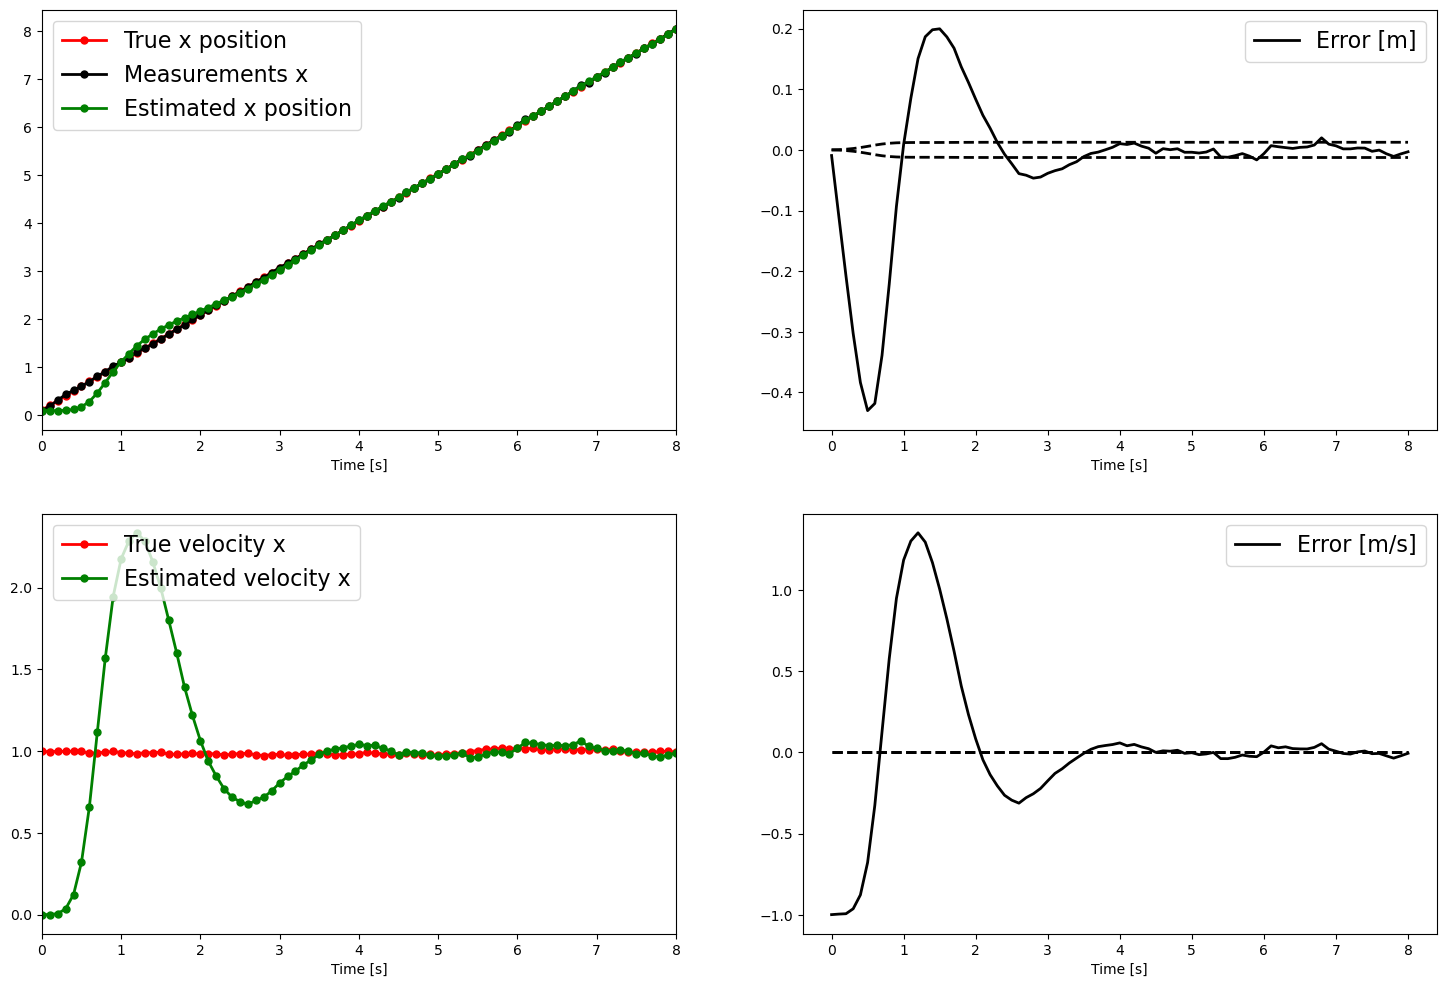

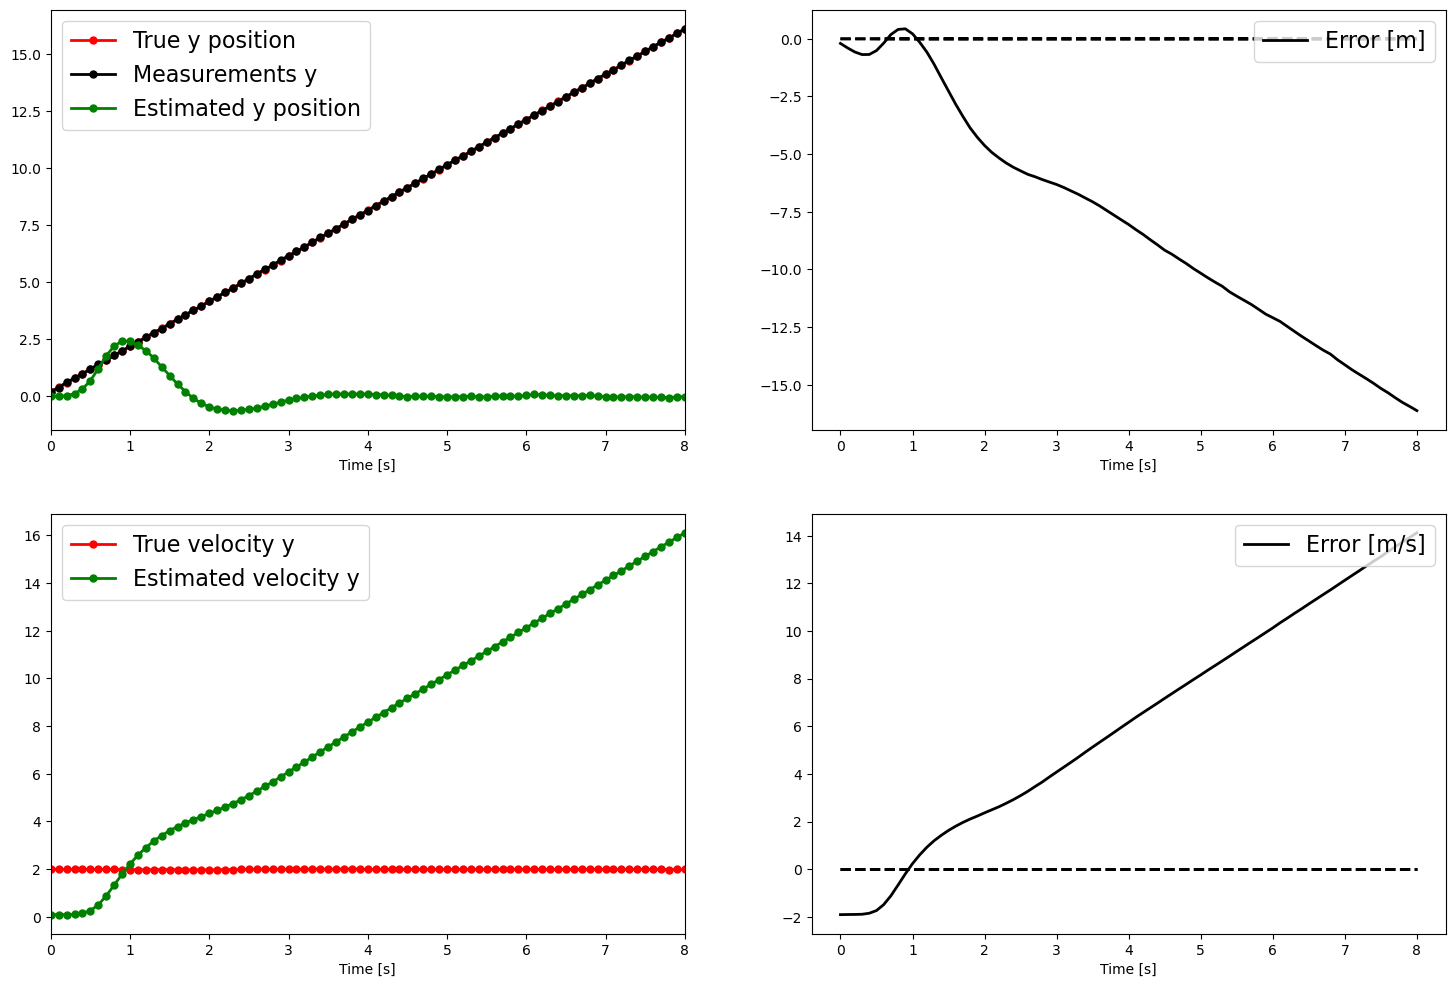

In [21]:
## DO NOT MODIFY THIS PART!!!
plt.rcParams['figure.figsize'] = [18,12]

FS = 16
LW = 2
MS = 10

t_vec = np.arange(0, t_end + dt, dt) # Time axis for plots

# Plot the results for X axis
plt.figure()

plt.subplot(221)
plt.plot(t_vec, x_true_mat[0,:], '-r.', linewidth = LW, markersize = MS, label = "True x position")
plt.plot(t_vec, z_vec[0,:], '-k.', linewidth = LW, markersize = MS, label = "Measurements x")
plt.plot(t_vec, x_est_mat[0,:], '-g.', linewidth = LW, markersize = MS, label = "Estimated x position")

plt.legend(loc = "upper left", fontsize = FS)
plt.xlim(0, t_end)
plt.xlabel('Time [s]')

plt.subplot(222)
plt.plot(t_vec, x_est_mat[0,:]-x_true_mat[0,:], '-k', linewidth = LW, markersize = MS, label = "Error [m]")
plt.plot(t_vec, 2*np.sqrt(P_est[:,0]), 'k--', linewidth = LW, markersize = MS)
plt.plot(t_vec, -2*np.sqrt(P_est[:,0]), 'k--', linewidth = LW, markersize = MS)
print("Mean squared error x-position: {}".format(((x_est_mat[0,:]-x_true_mat[0,:])**2).mean()))

plt.legend(loc = "upper right", fontsize = FS)
plt.xlabel('Time [s]')

plt.subplot(223)
plt.plot(t_vec, x_true_mat[1,:], '-r.', linewidth = LW, markersize = MS, label = "True velocity x")
plt.plot(t_vec, x_est_mat[1,:], '-g.', linewidth = LW, markersize = MS, label = "Estimated velocity x")

plt.legend(loc = "upper left", fontsize = FS)
plt.xlim(0, t_end)
plt.xlabel('Time [s]')

plt.subplot(224)
plt.plot(t_vec, x_est_mat[1,:]-x_true_mat[1,:], '-k', linewidth = LW, markersize = MS, label = "Error [m/s]")
plt.plot(t_vec, 2*np.sqrt(P_est[:,2*model_indicator+3]), 'k--', linewidth = LW, markersize = MS)
plt.plot(t_vec, -2*np.sqrt(P_est[:,2*model_indicator+3]), 'k--', linewidth = LW, markersize = MS)

plt.legend(loc = "upper right", fontsize = FS)
plt.xlabel('Time [s]')



# Plot the results for Y axis
plt.figure()

plt.subplot(221)
plt.plot(t_vec, x_true_mat[3,:], '-r.', linewidth = LW, markersize = MS, label = "True y position")
plt.plot(t_vec, z_vec[1,:], '-k.', linewidth = LW, markersize = MS, label = "Measurements y")
plt.plot(t_vec, x_est_mat[model_indicator+1,:], '-g.', linewidth = LW, markersize = MS, label = "Estimated y position")

plt.legend(loc = "upper left", fontsize = FS)
plt.xlim(0, t_end)
plt.xlabel('Time [s]')

plt.subplot(222)
plt.plot(t_vec, x_est_mat[model_indicator+1,:]-x_true_mat[3,:], '-k', linewidth = LW, markersize = MS, label = "Error [m]")
plt.plot(t_vec, 2*np.sqrt(P_est[:,1]), 'k--', linewidth = LW, markersize = MS)
plt.plot(t_vec, -2*np.sqrt(P_est[:,1]), 'k--', linewidth = LW, markersize = MS)
print("Mean squared error y-position: {}".format(((x_est_mat[model_indicator+1,:]-x_true_mat[3,:])**2).mean()))

plt.legend(loc = "upper right", fontsize = FS)
plt.xlabel('Time [s]')

plt.subplot(223)
plt.plot(t_vec, x_true_mat[4,:], '-r.', linewidth = LW, markersize = MS, label = "True velocity y")
plt.plot(t_vec, x_est_mat[model_indicator+2,:], '-g.', linewidth = LW, markersize = MS, label = "Estimated velocity y")

plt.legend(loc = "upper left", fontsize = FS)
plt.xlim(0, t_end)
plt.xlabel('Time [s]')

plt.subplot(224)
plt.plot(t_vec, x_est_mat[model_indicator+2,:]-x_true_mat[4,:], '-k', linewidth = LW, markersize = MS, label = "Error [m/s]")
plt.plot(t_vec, 2*np.sqrt(P_est[:,13*model_indicator+2]), 'k--', linewidth = LW, markersize = MS)
plt.plot(t_vec, -2*np.sqrt(P_est[:,13*model_indicator+2]), 'k--', linewidth = LW, markersize = MS)

plt.legend(loc = "upper right", fontsize = FS)
plt.xlabel('Time [s]')